In [6]:
%matplotlib inline

# Essentials: Data Cleansing and ETL
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerLine2D

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc # good for evaluation of binary classification problems
from sklearn.model_selection import train_test_split

<h1>
Importing Data
</h1>

In [7]:
df = pd.read_csv('C:/Users/Williams/DATA 606/NFL Play by Play 2009-2017 (v4).csv')
df.head(10)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
5,2009-09-10,2009091000,2,1,1.0,13:16,14,3496.0,11.0,TEN,...,NaN,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,NaN,NaN,2009
6,2009-09-10,2009091000,2,1,2.0,12:40,13,3460.0,36.0,TEN,...,0.163935,0.578453,0.421547,0.582881,0.417119,0.421547,-0.004427,-0.010456,0.006029,2009
7,2009-09-10,2009091000,2,1,3.0,12:11,13,3431.0,29.0,TEN,...,NaN,0.582881,0.417119,0.617544,0.382456,0.417119,-0.034663,NaN,NaN,2009
8,2009-09-10,2009091000,2,1,4.0,11:34,12,3394.0,37.0,TEN,...,NaN,0.617544,0.382456,0.591489,0.408511,0.382456,0.026054,NaN,NaN,2009
9,2009-09-10,2009091000,3,1,1.0,11:24,12,3384.0,10.0,TEN,...,0.541602,0.591489,0.408511,0.585405,0.414595,0.591489,-0.006084,-0.024526,0.018442,2009


<h1>
Exploratory Analysis - Predicting the Play Type
</h1>

<h3>
Looking at the Data
</h3>
<body>
    We can see that the data is particularily encompassing. 102 Columns of data is a lot more data than we'll need while building potential models. This is because more attributes can typically cause over-fitting for any method we decide to impliment.
    </body>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 317.3+ MB


In [9]:
df.shape

(407688, 102)

In [10]:
df.isnull().any()

Date                           False
GameID                         False
Drive                          False
qtr                            False
down                            True
time                            True
TimeUnder                      False
TimeSecs                        True
PlayTimeDiff                    True
SideofField                     True
yrdln                           True
yrdline100                      True
ydstogo                        False
ydsnet                         False
GoalToGo                        True
FirstDown                       True
posteam                         True
DefensiveTeam                   True
desc                            True
PlayAttempted                  False
Yards.Gained                   False
sp                             False
Touchdown                      False
ExPointResult                   True
TwoPointConv                    True
DefTwoPoint                     True
Safety                         False
O

In [11]:
df_passes = df[df.PlayType == "Pass"]
df_runs = df[df.PlayType == "Run"]

In [12]:
df_copy = df.copy()
df_copy.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


<h1>Analysis </h1>
<body>
    <p>To continue the project I want to look into play calling...</p>
</body>

In [13]:
plays = ['Date','GameID','qtr','time','yrdline100','PlayType','FieldGoalResult','FieldGoalDistance','posteam','DefensiveTeam','PosTeamScore','DefTeamScore','Season']
plays = df[plays]

# Filter out any random results of NA for the Play Type
plays = plays[plays.PlayType != 'NA']

<h3>Taking a Closer Look</h3>

<body>
    <p>To get a better idea of how certain variables impact the offensive coordinators play calling, we need to dive into the data and see if we can find any interesting aspects that could be related to the play calls.</p>
</body>

In [14]:
# take the dataframe for field goals above and shorten the scope of the columns to just FG information
play_attr = ['GameID','qtr','TimeSecs','yrdline100','ydstogo','Drive','down','PlayType','PassAttempt','RushAttempt','Yards.Gained','posteam','DefensiveTeam','PosTeamScore','DefTeamScore','Season']
play_attr2 = ['GameID','qtr','TimeSecs','yrdline100','ydstogo','Drive','down','PlayType','PassLength', 'PassAttempt','RushAttempt','Yards.Gained','posteam','DefensiveTeam','PassLocation', 'RunLocation','Season']
plays = df[play_attr]
plays2 = df[play_attr2]


plays = plays[plays.PlayType.notna() & (plays.PlayType != 'No Play') & (plays.PlayType != 'Kickoff') & (plays.PlayType != 'Extra Point')]
plays=plays.rename(columns = {'posteam':'Team'})
plays.head(5)

,GameID,qtr,TimeSecs,yrdline100,ydstogo,Drive,down,PlayType,PassAttempt,RushAttempt,Yards.Gained,Team,DefensiveTeam,PosTeamScore,DefTeamScore,Season
1,2009091000,1,3593.0,58.0,10,1,1.0,Pass,1,0,5,PIT,TEN,0.0,0.0,2009
2,2009091000,1,3556.0,53.0,5,1,2.0,Run,0,1,-3,PIT,TEN,0.0,0.0,2009
3,2009091000,1,3515.0,56.0,8,1,3.0,Pass,1,0,0,PIT,TEN,0.0,0.0,2009
4,2009091000,1,3507.0,56.0,8,1,4.0,Punt,0,0,0,PIT,TEN,0.0,0.0,2009
5,2009091000,1,3496.0,98.0,10,2,1.0,Run,0,1,0,TEN,PIT,0.0,0.0,2009


<h3>Pass and Rush Attempts League-Wide by Quarter of the Game:</h3>

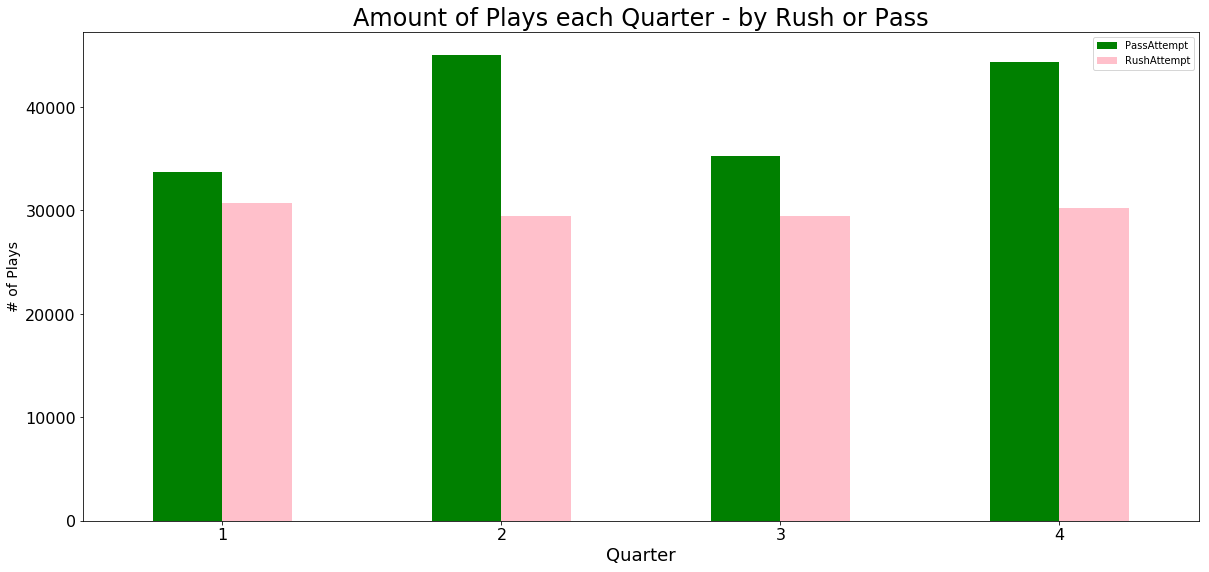

In [54]:
# group by qtr: count
regulation_plays = plays[plays.qtr != 5]
ax = regulation_plays.groupby(['qtr'])['PassAttempt','RushAttempt'].sum().plot.bar(figsize=(20,9),color=['green','pink'],rot=0,fontsize=16)
ax.set_title("Amount of Plays each Quarter - by Rush or Pass", fontsize=24)
ax.set_xlabel("Quarter", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)


<body>
    <p>As we can see, it seems that passing plays are more prominant in all categories. Recently, the play calling in the NFL has changed to a more pass-friendly offensive approach which has resulted in the value of high quality quarterbacks. The final goal here is to determine when teams are running the ball or passing the ball, so its helpful to get an idea of the aggregation first. One important distinction here is that the 2nd and 4th quarters see a spike in the amount of passing attempts but the rushing attempts remains fairly constant across the quarters. This is most likely due to teams trying to score before the possession changes in the 2nd half or to win at the end of the game due to the time-friendly rule that the clock stops after an incomplete pass and being able to throw the ball towards the sideline to stop the clock.
</p>
</body>

<h3>Play Call by Down</h3>


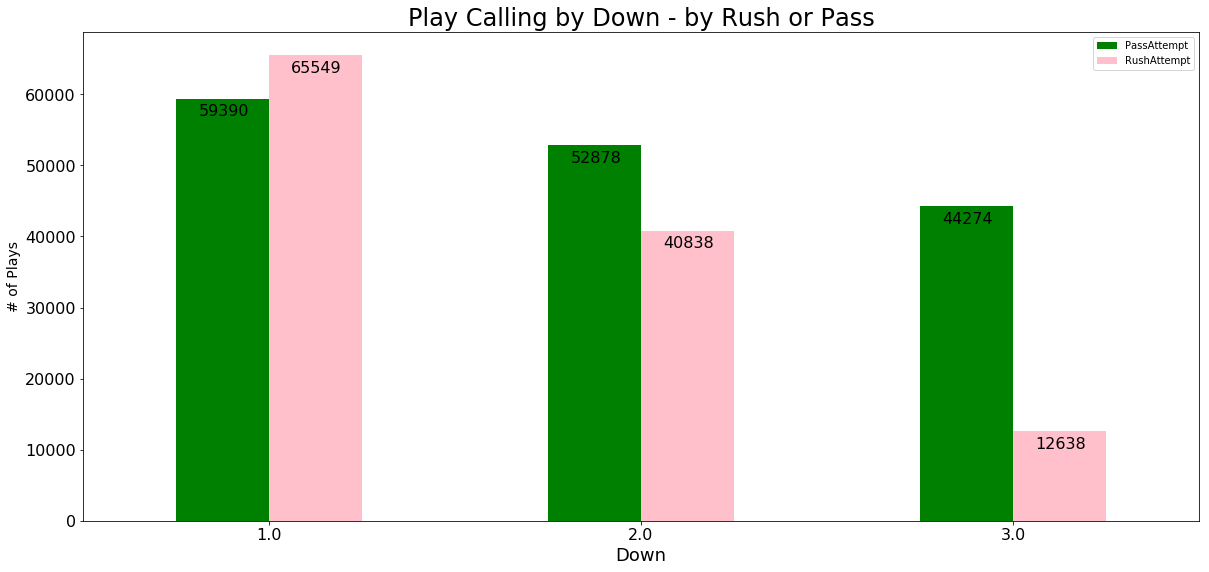

In [55]:
# group by qtr: count
plays_down = plays[plays.down <= 3]
ax = plays_down.groupby(['down'])['PassAttempt','RushAttempt'].sum().plot.bar(figsize=(20,9),color=['green','pink'],rot=0,fontsize=16)
ax.set_title("Play Calling by Down - by Rush or Pass", fontsize=24)
ax.set_xlabel("Down", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)

# set individual bar lables using above list
for i in ax.patches:
    # get_x: width; get_height: verticle
    ax.text(i.get_x()+.06, i.get_height()-2400, str(round((i.get_height()), 2)), fontsize=16, color='black',rotation=0)

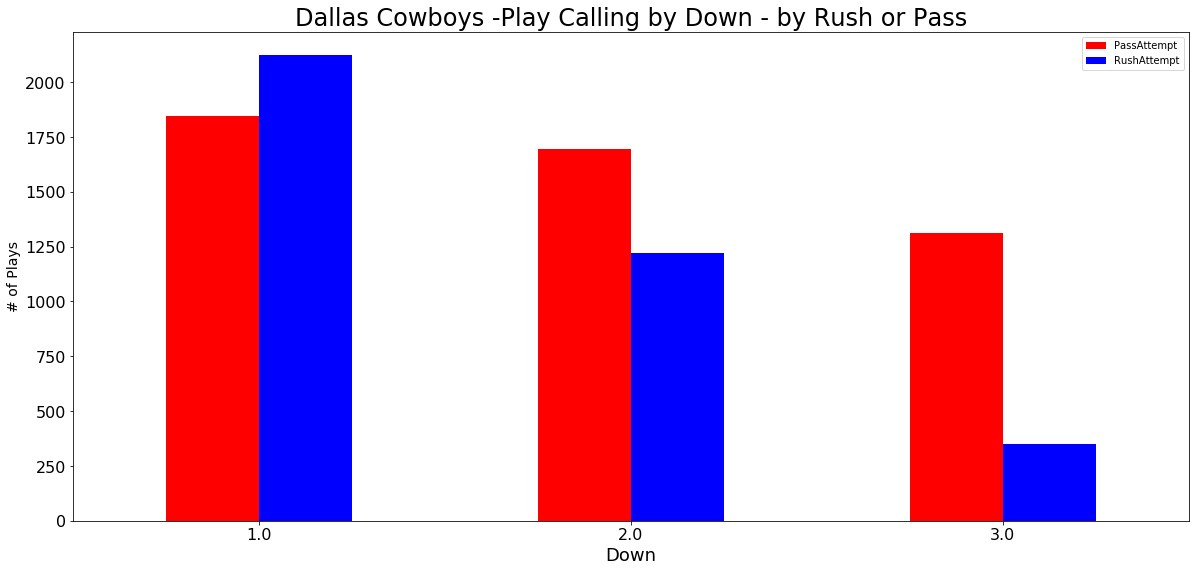

In [17]:
# group by qtr: count
dal_plays_down = plays[(plays.down <= 3) & (plays.Team == 'DAL')]
ax = dal_plays_down.groupby(['down'])['PassAttempt','RushAttempt'].sum().plot.bar(figsize=(20,9),color=['red','blue'],rot=0,fontsize=16)
ax.set_title("Dallas Cowboys -Play Calling by Down - by Rush or Pass", fontsize=24)
ax.set_xlabel("Down", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)


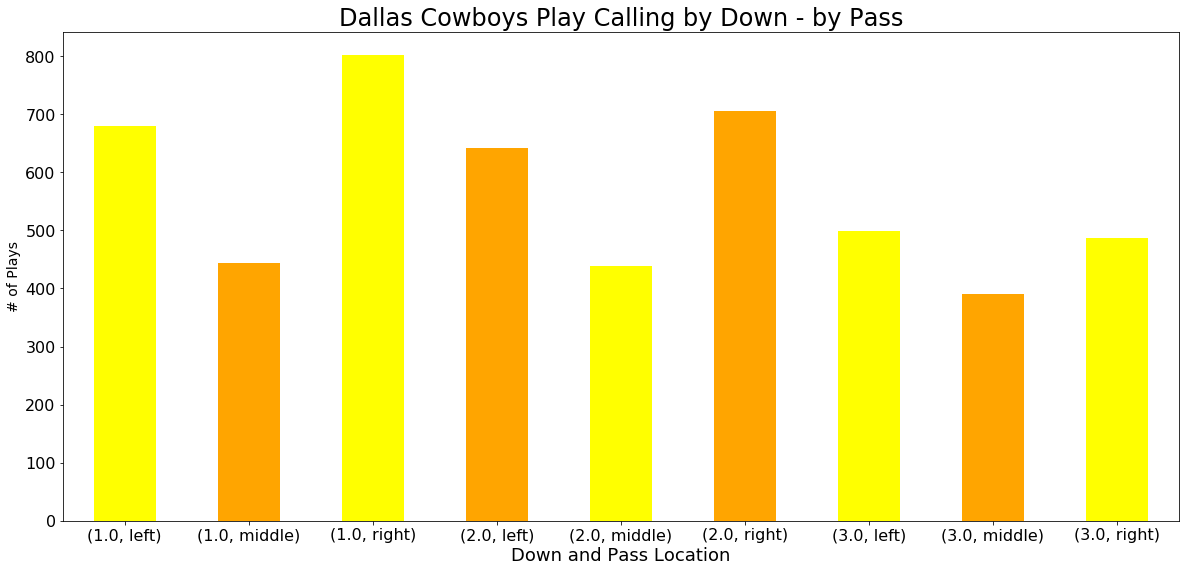

In [18]:
# group by qtr: count
plays_pass = plays2[(plays2.down <= 3) & (plays2.PassAttempt == 1) & (plays2.posteam == "DAL")]
ax = plays_pass.groupby(['down','PassLocation'])['PassLength'].count().plot.bar(figsize=(20,9),color=['yellow','orange'],rot=0,fontsize=16)
ax.set_title("Dallas Cowboys Play Calling by Down - by Pass", fontsize=24)
ax.set_xlabel("Down and Pass Location", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)


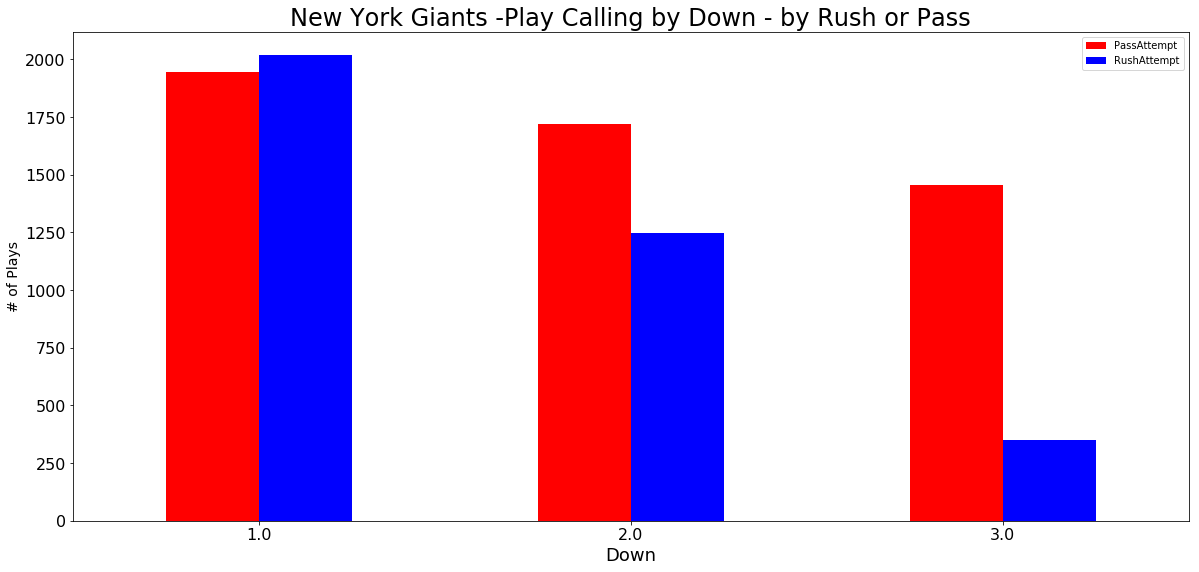

In [19]:
# group by qtr: count
nyg_plays_down = plays[(plays.down <= 3) & (plays.Team == 'NYG')]
ax = nyg_plays_down.groupby(['down'])['PassAttempt','RushAttempt'].sum().plot.bar(figsize=(20,9),color=['red','blue'],rot=0,fontsize=16)
ax.set_title("New York Giants -Play Calling by Down - by Rush or Pass", fontsize=24)
ax.set_xlabel("Down", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)


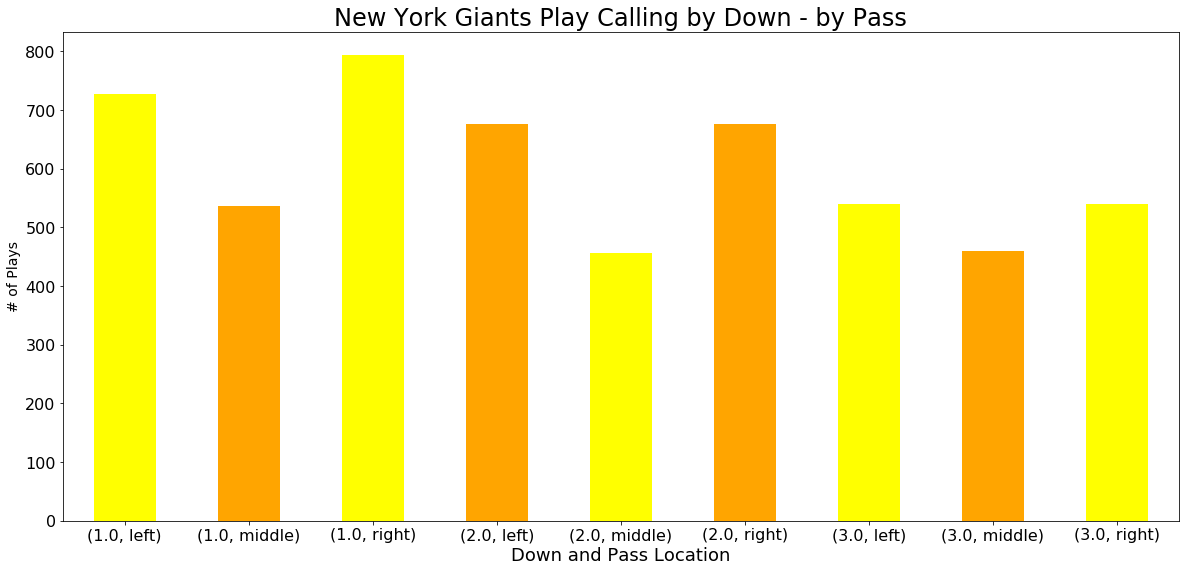

In [20]:
# group by qtr: count
plays_pass = plays2[(plays2.down <= 3) & (plays2.PassAttempt == 1) & (plays2.posteam == "NYG")]
ax = plays_pass.groupby(['down','PassLocation'])['PassLength'].count().plot.bar(figsize=(20,9),color=['yellow','orange'],rot=0,fontsize=16)
ax.set_title("New York Giants Play Calling by Down - by Pass", fontsize=24)
ax.set_xlabel("Down and Pass Location", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)


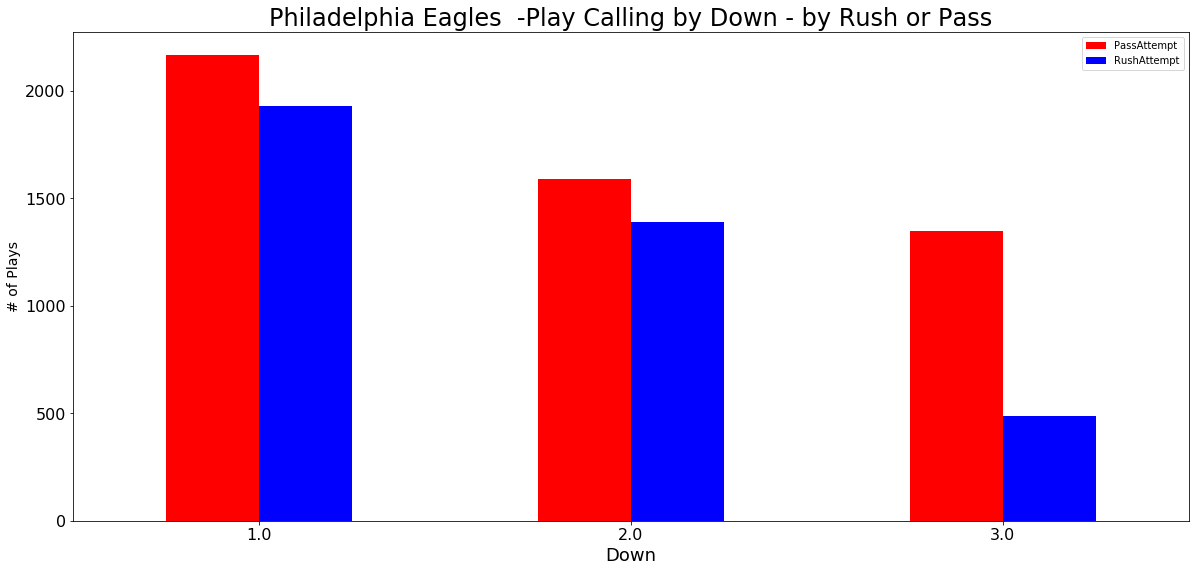

In [21]:
# group by qtr: count
phi_plays_down = plays[(plays.down <= 3) & (plays.Team == 'PHI')]
ax = phi_plays_down.groupby(['down'])['PassAttempt','RushAttempt'].sum().plot.bar(figsize=(20,9),color=['red','blue'],rot=0,fontsize=16)
ax.set_title("Philadelphia Eagles  -Play Calling by Down - by Rush or Pass", fontsize=24)
ax.set_xlabel("Down", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)


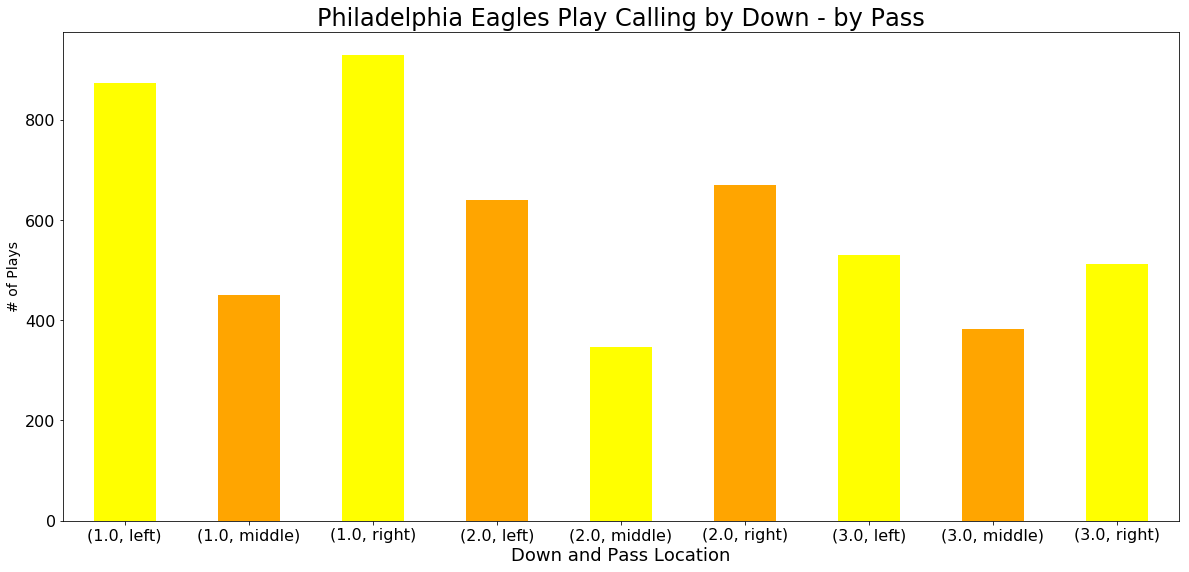

In [22]:
# group by qtr: count
plays_pass = plays2[(plays2.down <= 3) & (plays2.PassAttempt == 1) & (plays2.posteam == "PHI")]
ax = plays_pass.groupby(['down','PassLocation'])['PassLength'].count().plot.bar(figsize=(20,9),color=['yellow','orange'],rot=0,fontsize=16)
ax.set_title("Philadelphia Eagles Play Calling by Down - by Pass", fontsize=24)
ax.set_xlabel("Down and Pass Location", fontsize=18)
ax.set_ylabel("# of Plays", fontsize=14)
ax.set_alpha(0.8)


In [23]:
nyg_df = df[(df.posteam=='NYG') & (df.down.isin([1.0, 2.0, 3.0, 4.0])) & ((df.PlayType=='Run') | (df.PlayType == 'Pass'))]
dal_df = df[(df.posteam=='DAL') & (df.down.isin([1.0, 2.0, 3.0, 4.0])) & ((df.PlayType=='Run') | (df.PlayType == 'Pass'))]
phi_df = df[(df.posteam=='PHI') & (df.down.isin([1.0, 2.0, 3.0, 4.0])) & ((df.PlayType=='Run') | (df.PlayType == 'Pass'))]

In [24]:
nyg_df = nyg_df[play_attr2]
dal_df = dal_df[play_attr2]
phi_df = phi_df[play_attr2]

In [25]:
nyg_df.head()

,GameID,qtr,TimeSecs,yrdline100,ydstogo,Drive,down,PlayType,PassLength,PassAttempt,RushAttempt,Yards.Gained,posteam,DefensiveTeam,PassLocation,RunLocation,Season
2068,2009091310,1,3595.0,78.0,10,1,1.0,Pass,Short,1,0,3,NYG,WAS,right,NaN,2009
2069,2009091310,1,3570.0,75.0,7,1,2.0,Run,NaN,0,1,0,NYG,WAS,NaN,NaN,2009
2070,2009091310,1,3523.0,71.0,3,1,3.0,Pass,Short,1,0,7,NYG,WAS,middle,NaN,2009
2071,2009091310,1,3481.0,64.0,10,1,1.0,Pass,Short,1,0,0,NYG,WAS,left,NaN,2009
2072,2009091310,1,3473.0,64.0,10,1,2.0,Run,NaN,0,1,3,NYG,WAS,NaN,right,2009


In [26]:
import numpy as np
def get_full_play_type(play):
    play_type, pass_length, pass_location, run_location = play
    if(play_type == 'Run'):
        return play_type+'_'+run_location
    else:
        return play_type+'_'+pass_location  

In [27]:
nyg_df = nyg_df.replace(np.nan, 'unknown', regex=True)      
nyg_df['full_play_type'] = nyg_df[['PlayType', 'PassLength', 'PassLocation', 'RunLocation']].apply(get_full_play_type, axis=1)

In [28]:
dal_df = dal_df.replace(np.nan, 'unknown', regex=True)      
dal_df['full_play_type'] = dal_df[['PlayType', 'PassLength', 'PassLocation', 'RunLocation']].apply(get_full_play_type, axis=1)

In [29]:
phi_df = phi_df.replace(np.nan, 'unknown', regex=True)      
phi_df['full_play_type'] = phi_df[['PlayType', 'PassLength', 'PassLocation', 'RunLocation']].apply(get_full_play_type, axis=1)

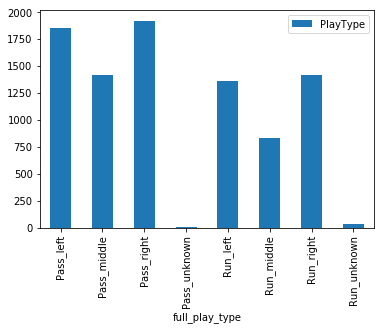

In [30]:
nyg_df.groupby(['full_play_type']).count()[['PlayType']].plot(kind='bar')

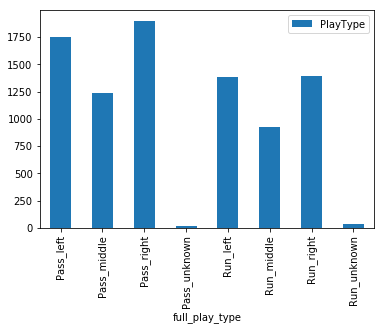

In [31]:
dal_df.groupby(['full_play_type']).count()[['PlayType']].plot(kind='bar')

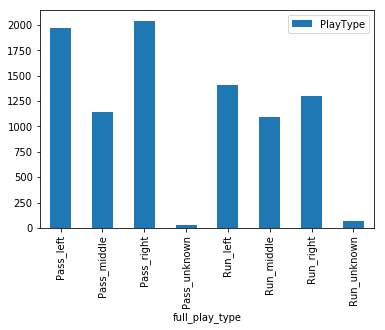

In [32]:
phi_df.groupby(['full_play_type']).count()[['PlayType']].plot(kind='bar')

In [33]:
play_model_attr = ['PlayAttempted','qtr','TimeSecs','yrdline100','ydstogo','Drive','down','PlayType','GoalToGo',
             'TimeUnder','PlayTimeDiff','PassAttempt','RushAttempt','PosTeamScore',
             'DefTeamScore','HomeTimeouts_Remaining_Pre','AwayTimeouts_Remaining_Pre','No_Score_Prob',
             'Field_Goal_Prob','Safety_Prob','Win_Prob','ExpPts','Touchdown_Prob' , 'EPA', 'WPA' ]
play_model = df[play_model_attr]

In [34]:
# filter out the records that we wont use to predict run or pass
play_model = play_model[play_model.PlayType.notna()&
              (play_model.PlayType != 'No Play')&
              (play_model.PlayType != 'Kickoff')&
              (play_model.PlayType != 'Extra Point')&
              (play_model.PlayType != 'End of Game')&
              (play_model.PlayType != 'Quarter End')&
              (play_model.PlayType != 'Half End')&
              (play_model.PlayType != 'Two Minute Warning')&
              (play_model.PlayType != 'Field Goal')&
              (play_model.PlayType != 'Punt')]

In [35]:
# assure that there was a play attempted to filter out penalties before the play occured.
play_model = play_model[play_model.PlayAttempted == 1]

In [36]:
play_model = play_model.rename(columns = {'posteam':'Team'})
play_model['ScoreDiff'] = play_model['PosTeamScore'] - play_model['DefTeamScore']

In [37]:
play_model.TimeSecs = play_model.TimeSecs.fillna(0).astype(int)
play_model.yrdline100 = play_model.yrdline100.fillna(0).astype(int)
play_model.down = play_model.down.fillna(0).astype(int)
play_model.PosTeamScore = play_model.PosTeamScore.fillna(0).astype(int)
play_model.DefTeamScore = play_model.DefTeamScore.fillna(0).astype(int)
play_model.ScoreDiff = play_model.ScoreDiff.fillna(0).astype(int)
play_model.PlayTimeDiff = play_model.PlayTimeDiff.fillna(0).astype(int)
play_model.GoalToGo = play_model.GoalToGo.fillna(0).astype(int)

In [43]:
play_model = play_model[(play_model.PassAttempt == 1)|(play_model.RushAttempt == 1)]
play_model['PlayType'] = play_model.apply(lambda x: 1 if x.PassAttempt == 1 else 0, axis=1)
play_model.PlayType = play_model.PlayType.fillna(0).astype(int)

play_model.No_Score_Prob = play_model.No_Score_Prob.fillna(0).astype(np.float32)
play_model.Field_Goal_Prob = play_model.Field_Goal_Prob.fillna(0).astype(np.float32)
play_model.Safety_Prob = play_model.Safety_Prob.fillna(0).astype(np.float32)
play_model.Touchdown_Prob = play_model.Touchdown_Prob.fillna(0).astype(np.float32)
play_model.Win_Prob = play_model.Win_Prob.fillna(0).astype(np.float32)
play_model.ExpPts = play_model.ExpPts.fillna(0).astype(np.float32)
play_model.WPA = play_model.WPA.fillna(0).astype(np.float32)
play_model.EPA = play_model.WPA.fillna(0).astype(np.float32)

In [44]:
play_model.columns

Index(['PlayAttempted', 'qtr', 'TimeSecs', 'yrdline100', 'ydstogo', 'Drive',
       'down', 'PlayType', 'GoalToGo', 'TimeUnder', 'PlayTimeDiff',
       'PassAttempt', 'RushAttempt', 'PosTeamScore', 'DefTeamScore',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'No_Score_Prob', 'Field_Goal_Prob', 'Safety_Prob', 'Win_Prob', 'ExpPts',
       'Touchdown_Prob', 'EPA', 'WPA', 'ScoreDiff'],
      dtype='object')

In [45]:
X = play_model.drop(['PlayType','PlayAttempted', 'PassAttempt', 'RushAttempt','PosTeamScore', 'DefTeamScore'], axis=1)

y = play_model.PlayType
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state = 25)

In [46]:
dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_y)

dt_predictions = dtc.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, dt_predictions)
dt_roc_auc = auc(false_positive_rate, true_positive_rate)

In [47]:
rf = RandomForestClassifier()
rf.fit(train_X, train_y)

rf_predictions = rf.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, rf_predictions)
rf_roc_auc = auc(false_positive_rate, true_positive_rate)

C:\Users\Williams\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)

lr_predictions = log_reg.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, lr_predictions)
lr_roc_auc = auc(false_positive_rate, true_positive_rate)

C:\Users\Williams\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_y)

knn_predictions = knn.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, knn_predictions)
knn_roc_auc = auc(false_positive_rate, true_positive_rate)

In [50]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN',],
    'AUC': [dt_roc_auc, rf_roc_auc, lr_roc_auc, knn_roc_auc]})
result_df = results.sort_values(by='AUC', ascending=False)
result_df = result_df.set_index('AUC')
result_df.head(7)

,Model
AUC,
0.731095,Random Forest
0.673374,Decision Tree
0.650640,Logistic Regression
0.584557,KNN


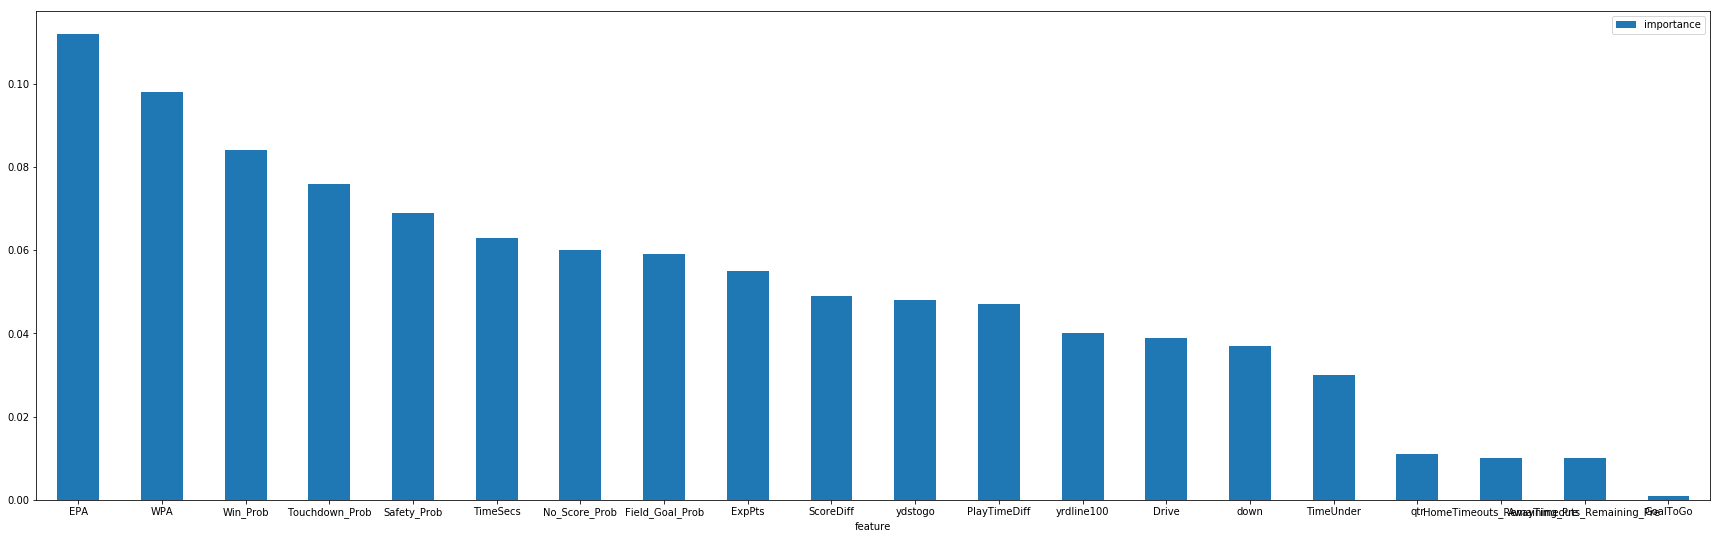

In [53]:
#Here, I look at how important the features are.
importances = pd.DataFrame({'feature':train_X.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar(figsize=(30,9), rot=0)